#### Mesures de conductivité - interprétation résultats

Pour information, les parcelles sont appelées "stations" dans le code tandis que les stations sont appelées "stations_group"

In [177]:
#Conductivité mesures

#Importer les librairies
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy.stats import linregress

# Charger les données
df_raw = pd.read_excel("data\Prélèvement et mesure du 19_05.xlsx", sheet_name="Feuille 1", header=None)

#df_raw.head()
df_raw.iloc[:,15:20]


,15,16,17,18,19
0,Av4,NaN,NaN,RH1,NaN
1,Sans eau,Avec Eau,NaN,Sans eau,Avec Eau
2,2.379,2.531,NaN,2.375,2.783
3,2.369,2.528,NaN,2.369,2.865
4,2.365,2.53,NaN,2.375,2.872
5,2.37,2.696,NaN,2.379,2.674
6,2.375,2.697,NaN,2.373,2.556
7,2.373,2.663,NaN,2.376,2.467
8,3.9,NaN,NaN,5.6,NaN
9,4.8,NaN,NaN,5,NaN


In [178]:
# Noms des temps associés aux lignes 1 à 6
temps_labels = [
    "5' avant flush", "10' avant flush", "15' avant flush",
    "5' après flush", "10' après flush", "15' après flush"
]

# Lignes d’intérêt pour les mesures de masse (index de 1 à 6)
masse_rows = list(range(2, 8))
diam_row = 8
long_row = 9

# Initialiser les résultats
data = []

# Itérer sur les colonnes par paires (Sans eau / Avec eau)

loc= list(range(1, 17, 2)) + list(range(18, df_raw.shape[1] , 2))

for col in loc:
    station = df_raw.iloc[0, col]  # Nom de la station
    if pd.isna(station):
        continue
 # Récupérer diamètre et longueur
    try:
        diametre = df_raw.iloc[diam_row, col]
        longueur = df_raw.iloc[long_row, col]
    except:
        diametre, longueur = np.nan, np.nan
    
    for i, row in enumerate(masse_rows):
        try:
            masse_vide = df_raw.iloc[row, col]
            masse_pleine = df_raw.iloc[row, col + 1]
            if pd.notna(masse_vide) and pd.notna(masse_pleine):
                dmasse = masse_pleine - masse_vide

                data.append({
                    "station": station,
                    "temps": temps_labels[i],
                    "masse_vide": masse_vide,
                    "masse_pleine": masse_pleine,
                    "dmasse": dmasse,
                    "diametre_mm": diametre,
                    "longueur_cm": longueur,
                })
        except:
            continue

df_tot=pd.DataFrame(data)

In [179]:
# Cellule de test

#df_tot
df_raw.iloc[2:8, col]  # pour voir les 6 lignes de masse


2    2.376
3    2.365
4    2.445
5    2.372
6    2.352
7    2.361
Name: 40, dtype: object

In [180]:
## Ici, on calcule la masse cumulée à 10 et 15 minutes

# Extraire les minutes (5, 10, 15) et le flush status ("avant" ou "après")
df_mesures=df_tot
df_mesures["minute"] = df_mesures["temps"].str.extract(r"(\d+)'").astype(int)
df_mesures["flush_status"] = df_mesures["temps"].str.extract(r"(avant|après)")

# Trier pour assurer le bon ordre chronologique
df_mesures = df_mesures.sort_values(by=["station", "flush_status", "minute"])

# Calcul du cumul
df_mesures["dmasse_cum"] = df_mesures.groupby(["station", "flush_status"])["dmasse"].cumsum()

In [181]:
# Affichage du dataframe

df_mesures

,station,temps,masse_vide,masse_pleine,dmasse,diametre_mm,longueur_cm,minute,flush_status,dmasse_cum
26,Av1,5' après flush,2.368,2.513,0.145,4.1,6.8,5,après,0.145
27,Av1,10' après flush,2.354,2.503,0.149,4.1,6.8,10,après,0.294
28,Av1,15' après flush,2.347,2.516,0.169,4.1,6.8,15,après,0.463
23,Av1,5' avant flush,2.371,2.668,0.297,4.1,6.8,5,avant,0.297
24,Av1,10' avant flush,2.356,2.586,0.230,4.1,6.8,10,avant,0.527
...,...,...,...,...,...,...,...,...,...,...
93,TR4,10' après flush,2.361,2.623,0.262,5.0,4.9,10,après,0.534
94,TR4,15' après flush,2.348,2.610,0.262,5.0,4.9,15,après,0.796
89,TR4,5' avant flush,2.378,2.974,0.596,5.0,4.9,5,avant,0.596
90,TR4,10' avant flush,2.348,2.905,0.557,5.0,4.9,10,avant,1.153


In [182]:
# Création d'une liste reprenant les parcelles

stations = df_mesures['station'].unique()

stations


array(['Av1', 'Av2', 'Av3', 'Av4', 'RB1', 'RB2', 'RB3', 'RB4', 'RH1',
       'RH2', 'RH3', 'RH4', 'TA1', 'TA2', 'TA3', 'TA4', 'TR1', 'TR2',
       'TR3', 'TR4'], dtype=object)

In [183]:
# Définition du df qui va regrouper les conductivités, on ne garde que deux lignes par parcelles ("avant" et "après")

df_conduc= df_mesures[df_mesures["minute"] == 15]


C:\Users\chate\AppData\Local\Temp\ipykernel_27340\869323602.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_conduc.loc[(df_conduc['station'] == station) & (df_conduc['flush_status'] == 'avant'), 'pente'] = slope_avant


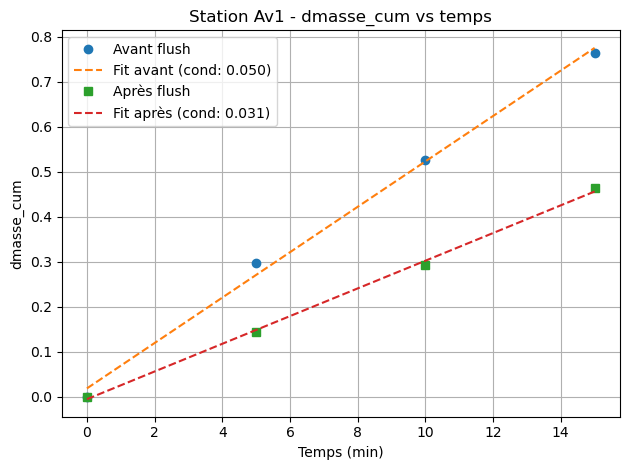

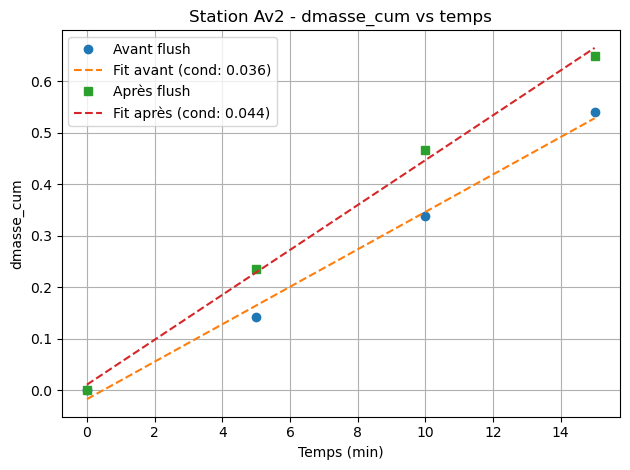

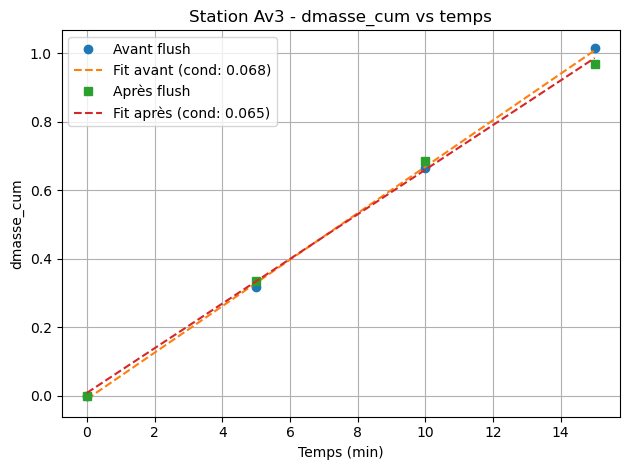

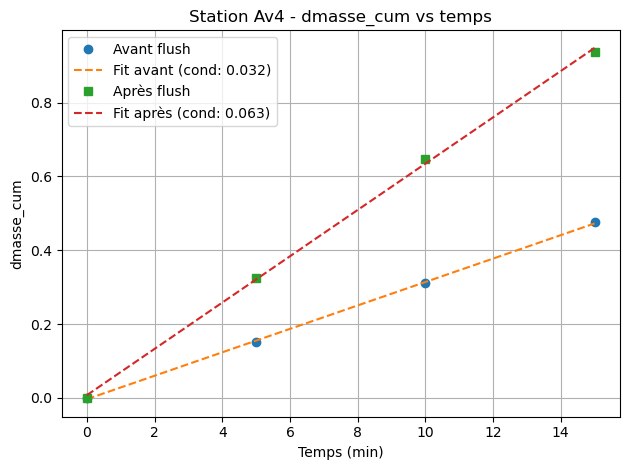

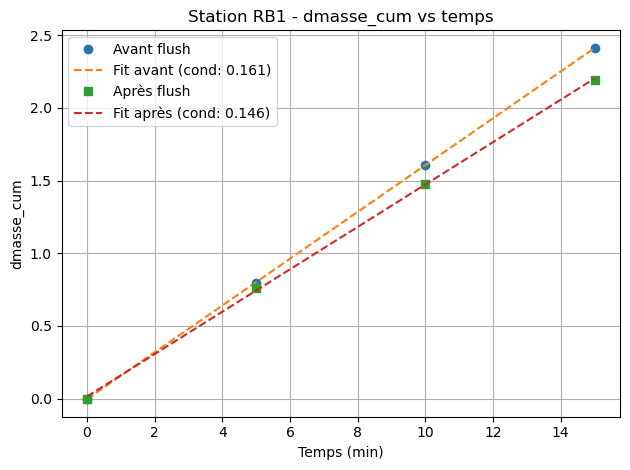

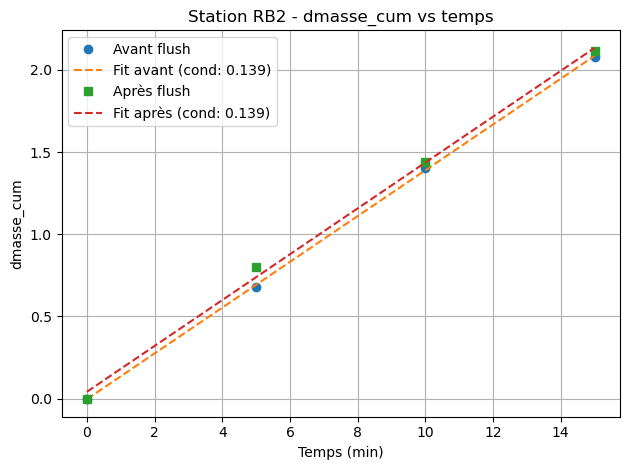

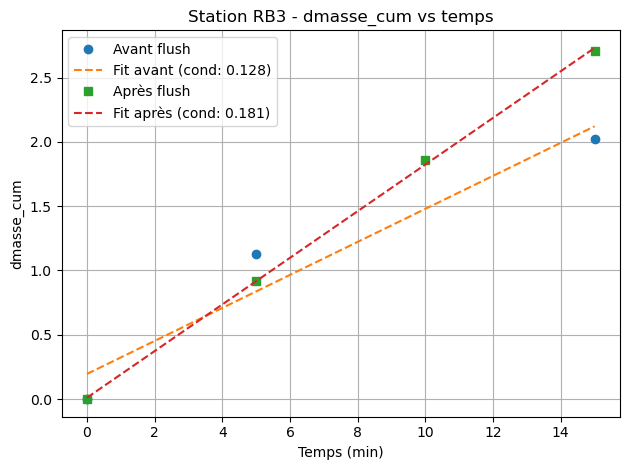

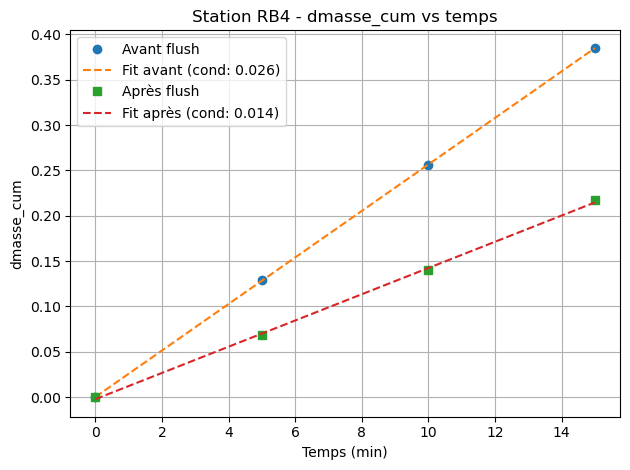

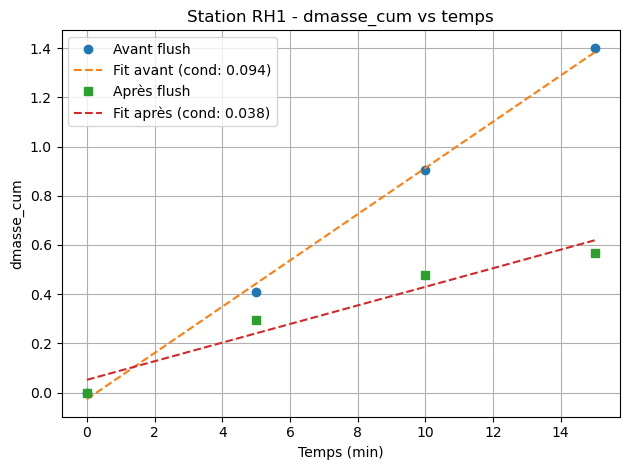

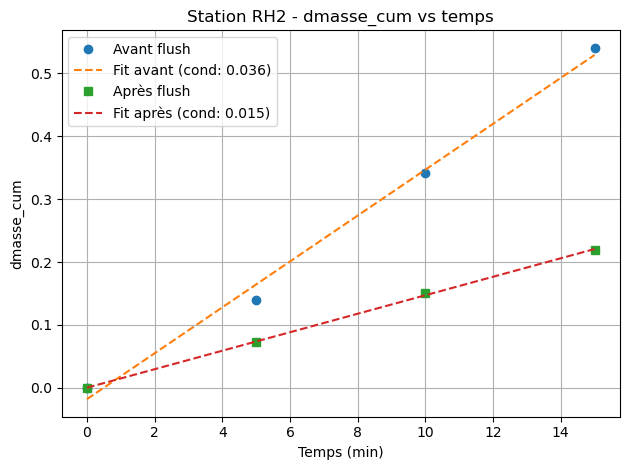

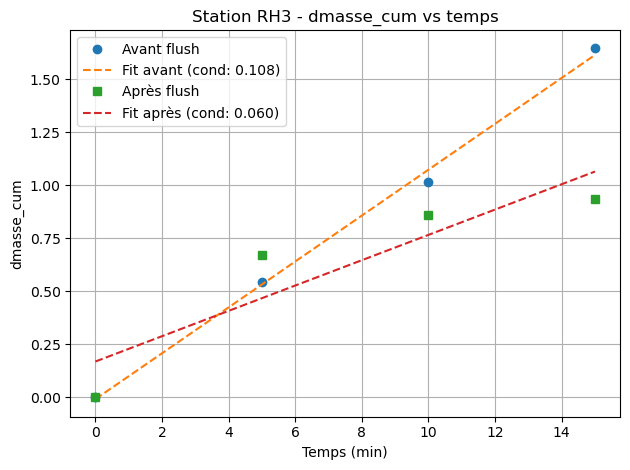

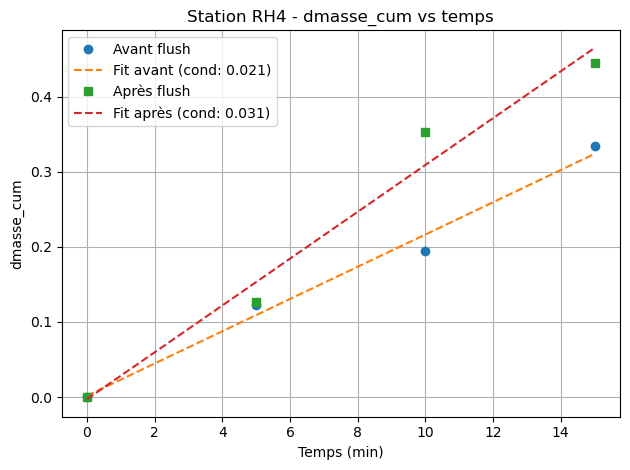

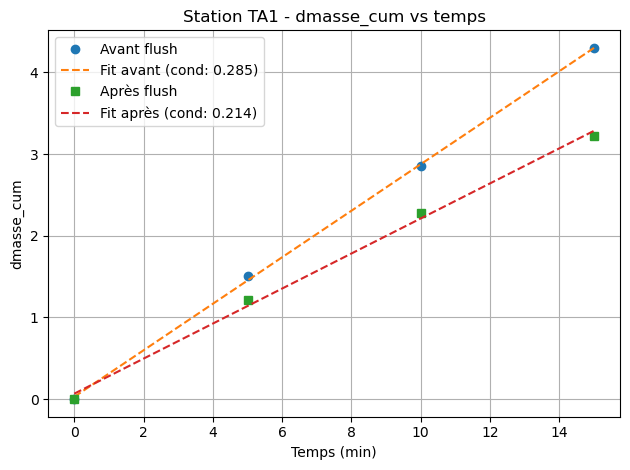

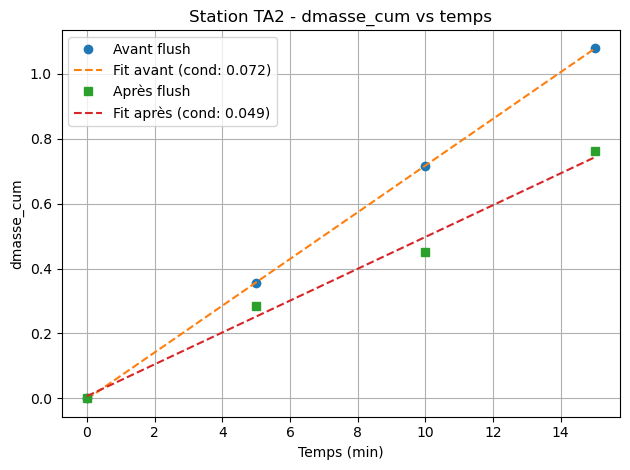

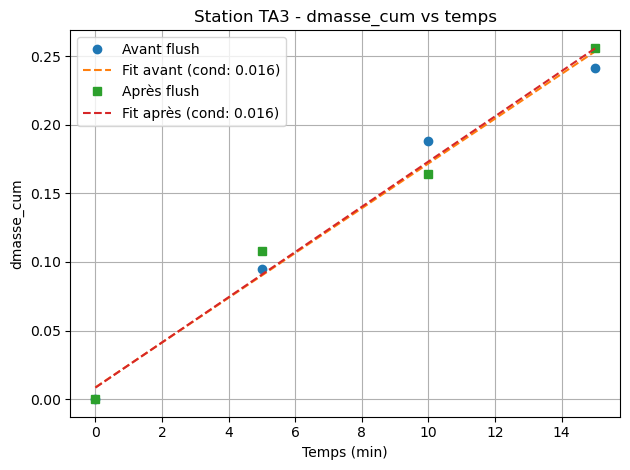

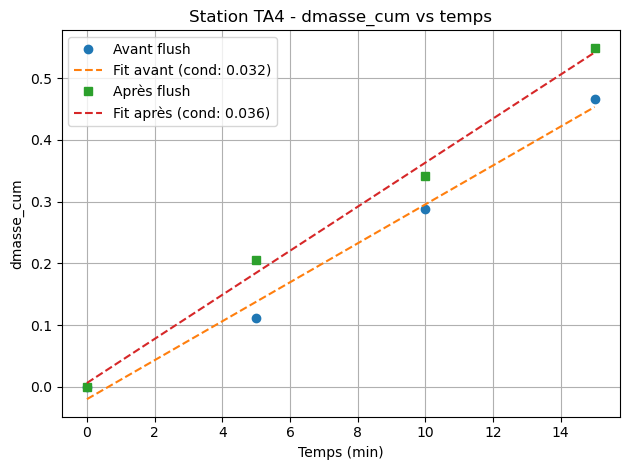

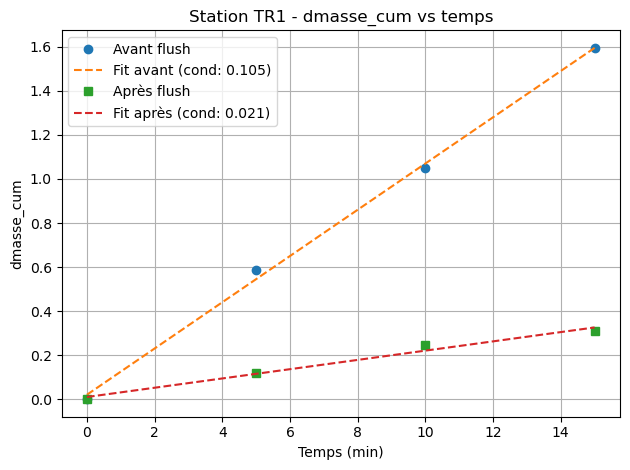

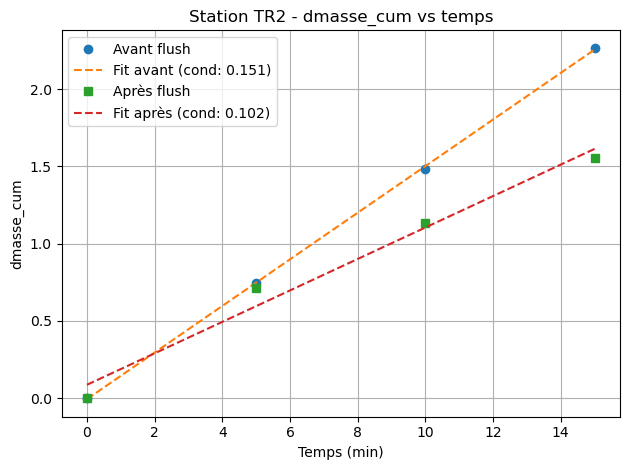

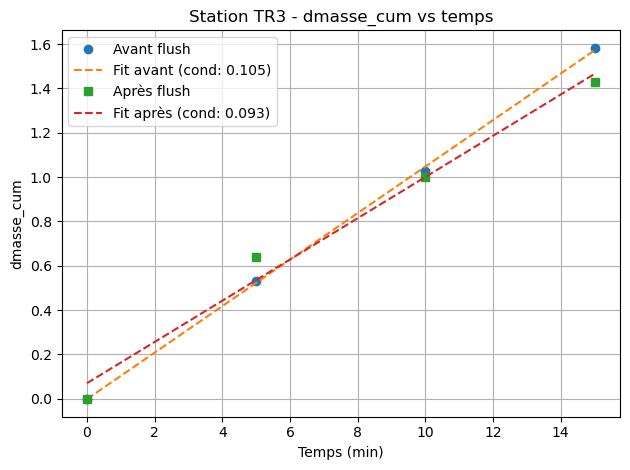

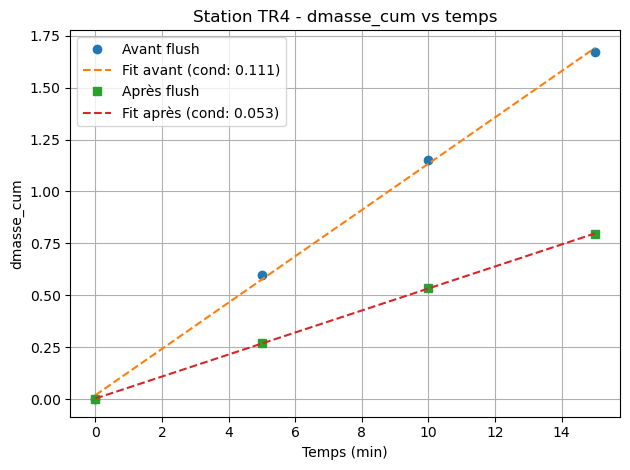

In [184]:
# Régression linéaire pour détermination du débit massique (pente)

stations = df_mesures['station'].unique()

for station in stations:
    df_station = df_mesures[df_mesures['station'] == station]
    
    # Séparer les données "avant" et "après" le flush
    df_avant = df_station[df_station['flush_status'] == 'avant'].sort_values(by='minute')
    df_apres = df_station[df_station['flush_status'] == 'après'].sort_values(by='minute')
    
    minutes_avant= [0] + df_avant['minute'].tolist()
    minutes_apres= [0] + df_apres['minute'].tolist()
    dmasse_avant= [0] + df_avant['dmasse_cum'].tolist()
    dmasse_apres= [0] + df_apres['dmasse_cum'].tolist()


    fig, ax = plt.subplots()
    
    # Fit linéaire - AVANT
    slope_avant, intercept_avant, r_value, p_value, std_err = linregress(minutes_avant, dmasse_avant)
    fit_avant = [slope_avant * t + intercept_avant for t in minutes_avant]
    ax.plot(minutes_avant, dmasse_avant, 'o', label='Avant flush')
    ax.plot(minutes_avant, fit_avant, '--', label=f'Fit avant (cond: {slope_avant:.3f})')
    df_conduc.loc[(df_conduc['station'] == station) & (df_conduc['flush_status'] == 'avant'), 'pente'] = slope_avant
    
    # Fit linéaire - APRÈS
    slope_apres, intercept_apres, r_value, p_value, std_err = linregress(minutes_apres, dmasse_apres)
    fit_apres = [slope_apres * t + intercept_apres for t in minutes_apres]
    ax.plot(minutes_apres, dmasse_apres, 's', label='Après flush')
    ax.plot(minutes_apres, fit_apres, '--', label=f'Fit après (cond: {slope_apres:.3f})')
    df_conduc.loc[(df_conduc['station'] == station) & (df_conduc['flush_status'] == 'après'), 'pente'] = slope_apres

    # Format du plot
    ax.set_title(f'Station {station} - dmasse_cum vs temps')
    ax.set_xlabel('Temps (min)')
    ax.set_ylabel('dmasse_cum')
    ax.legend()
    ax.grid(True)
    plt.tight_layout()
    plt.show()

In [185]:
#Affichage de df_conduc, répertoriant toutes les pentes

df_conduc.head()

,station,temps,masse_vide,masse_pleine,dmasse,diametre_mm,longueur_cm,minute,flush_status,dmasse_cum,pente
28,Av1,15' après flush,2.347,2.516,0.169,4.1,6.8,15,après,0.463,0.03076
25,Av1,15' avant flush,2.366,2.603,0.237,4.1,6.8,15,avant,0.764,0.05044
34,Av2,15' après flush,2.348,2.531,0.183,3.4,6.4,15,après,0.650,0.04364
31,Av2,15' avant flush,2.352,2.554,0.202,3.4,6.4,15,avant,0.541,0.03640
40,Av3,15' après flush,2.360,2.645,0.285,4.1,5.3,15,après,0.969,0.06514


Calcul de la conductivité hydraulique (basé sur Lovelock et al.)
- pente obtenue en g/min
- différence de pression : 0,19 bar (moyenne temporelle entre 0,24 et 0,14)

Unité de Catherine pour la conductivité : (kg.m-1.s-1.MPa-1)x10-6

Protocole de calcul :
- conversion pente en kg/s (x60/1000=x0,06)
- division par longueur après conversion longueur en m (x 100/l)
- division par différence pression après conversion pression en MPa (/10P)

soit :
$c=0.6\times \frac{p}{l\times\Delta P}$

In [186]:
# Calcul de la conductivité

df_conduc['conductivite']=0.6*df_conduc['pente']/(df_conduc['longueur_cm']*0.19)

C:\Users\chate\AppData\Local\Temp\ipykernel_27340\759568308.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_conduc['conductivite']=0.6*df_conduc['pente']/(df_conduc['longueur_cm']*0.19)


In [187]:
# Affichage

df_conduc.head()

,station,temps,masse_vide,masse_pleine,dmasse,diametre_mm,longueur_cm,minute,flush_status,dmasse_cum,pente,conductivite
28,Av1,15' après flush,2.347,2.516,0.169,4.1,6.8,15,après,0.463,0.03076,0.014285
25,Av1,15' avant flush,2.366,2.603,0.237,4.1,6.8,15,avant,0.764,0.05044,0.023424
34,Av2,15' après flush,2.348,2.531,0.183,3.4,6.4,15,après,0.650,0.04364,0.021533
31,Av2,15' avant flush,2.352,2.554,0.202,3.4,6.4,15,avant,0.541,0.03640,0.017961
40,Av3,15' après flush,2.360,2.645,0.285,4.1,5.3,15,après,0.969,0.06514,0.038812


In [188]:
# Nouveau df de résultats qui rassemble les conductivités "avant", "après" et la perte de conductivité
df_results = df_conduc.pivot(index='station', columns='flush_status', values='conductivite').reset_index()

# Calcul de la perte de conductivité
df_results['perte_conductivite'] = (df_results['avant'] - df_results['après']) / df_results['avant']


# On ajoute la colonnes avec les stations (les vraies), puis on trie pour le plot

def regrouper_station(station):
    if station.startswith('Av'):
        return 'Av'
    if station.startswith('RB'):
        return 'RB'
    if station.startswith('RH'):
        return 'RH'
    if station.startswith('TA'):
        return 'TA'
    if station.startswith('TR'):
        return 'TR'
    return None

df_results['station_group'] = df_results['station'].apply(regrouper_station)

ordre=['RB','RH','TR','TA','Av']
df_results['station_group'] = pd.Categorical(df_results['station_group'], categories=ordre, ordered=True)
df_results = df_results.sort_values('station_group').reset_index(drop=True)

df_results

flush_status,station,après,avant,perte_conductivite,station_group
0,RB1,0.062211,0.068688,0.094309,RB
1,RB2,0.064765,0.064672,-0.001436,RB
2,RB3,0.114493,0.081059,-0.412467,RB
3,RB4,0.007025,0.012457,0.436037,RB
4,RH2,0.008747,0.021712,0.597146,RH
5,RH4,0.017263,0.011889,-0.452004,RH
6,RH1,0.023874,0.059356,0.597787,RH
7,RH3,0.034300,0.062147,0.448078,RH
8,TR2,0.065594,0.097186,0.325066,TR
9,TR1,0.015835,0.078962,0.799467,TR


In [189]:
import seaborn as sns

Text(0.5, 1.0, 'Perte de conductivité par station (perte>0)')

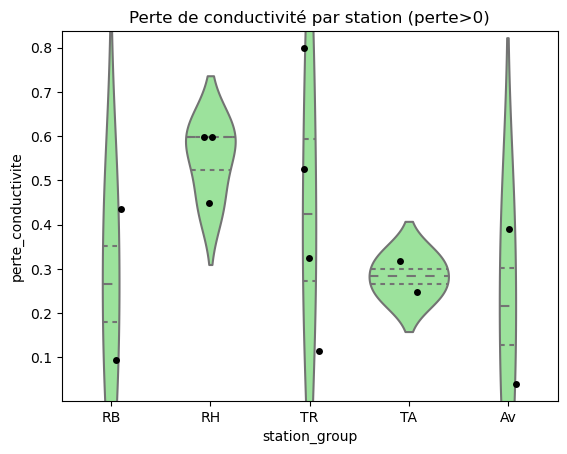

In [190]:
# Plot sous forme d'un violinplot

df_violin = df_results[df_results['perte_conductivite']>0]

sns.violinplot(x='station_group',y='perte_conductivite',data=df_violin, split=True, inner='quartile', color='lightgreen')
sns.stripplot(x='station_group', y='perte_conductivite', data=df_violin, color='black')
plt.title('Perte de conductivité par station (perte>0)')


Text(0.5, 1.0, 'Conductivité native')

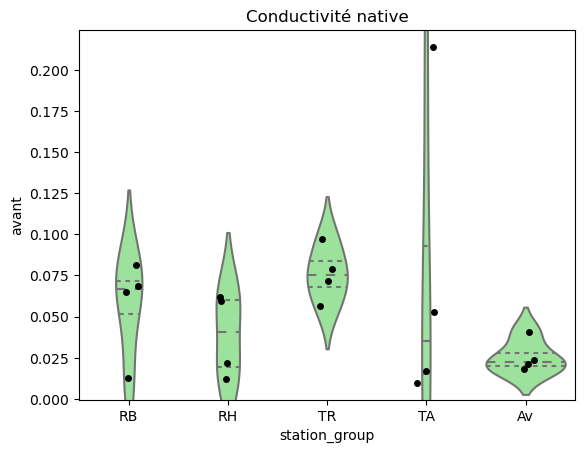

In [191]:
df_violin2 = df_results

sns.violinplot(x='station_group',y='avant',data=df_violin2, split=True, inner='quartile', color='lightgreen')
sns.stripplot(x='station_group', y='avant', data=df_violin2, color='black')
plt.title('Conductivité native')
